In [1]:
import sympy as sy
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

## Exercise 1

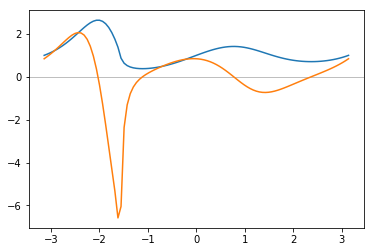

In [2]:
x = sy.symbols('x')
def ex1func():
    #Don't know how to "Define a Function"
    f = (sin(x) + 1) ** (sin(cos(x)))
    fprime = sy.diff(f)
    return f, fprime

f, fprime = ex1func()

#Plot
res = 100
xgrid = np.linspace(-np.pi, np.pi, res)
fvals = np.zeros(res)
fprimevals = np.zeros(res)
for i in range(res):
    fvals[i] = f.subs('x', xgrid[i])
    fprimevals[i] = fprime.subs('x', xgrid[i])
fig, ax = plt.subplots()
ax.plot(xgrid, fvals, label = 'f')
ax.plot(xgrid, fprimevals, label = 'f')
ax.set_yticks([0], minor = True)
ax.yaxis.grid(True, which='minor')
plt.show()

## Exercise 2

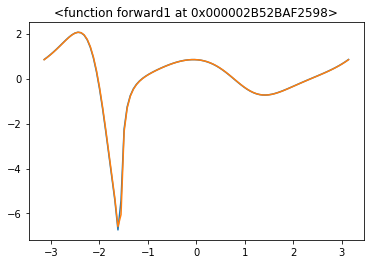

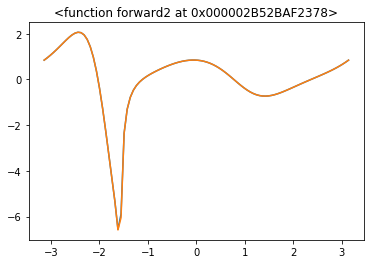

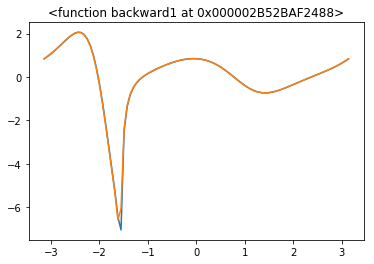

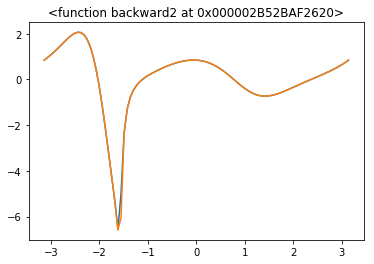

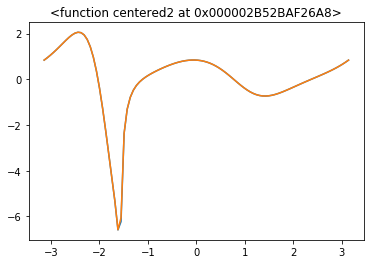

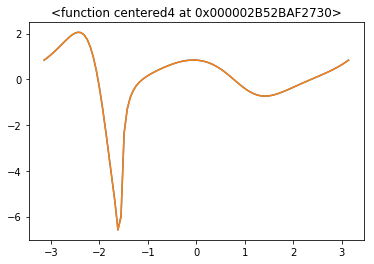

In [3]:
f, fprime = ex1func()
xgrid = np.linspace(-np.pi, np.pi, res)
h = .001

def forward1(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = (f.subs('x', xgrid[i] + h) - f.subs('x', xgrid[i])) / h 
    return diffquot

def forward2(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = ( -3 * f.subs('x', xgrid[i]) + 4 * f.subs('x', xgrid[i] + h) - f.subs('x', xgrid[i] + 2*h) ) / (2 * h) 
    return diffquot

def backward1(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = (f.subs('x', xgrid[i]) - f.subs('x', xgrid[i] - h)) / h 
    return diffquot

def backward2(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = (3 * f.subs('x', xgrid[i]) - 4 * f.subs('x', xgrid[i] - h) + f.subs('x', xgrid[i] - 2 * h))/ (2 * h) 
    return diffquot

def centered2(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = (f.subs('x', xgrid[i] + h) - f.subs('x', xgrid[i] - h)) / (2*h) 
    return diffquot

def centered4(f, xgrid, h):
    diffquot = np.zeros(len(xgrid))
    for i in range(len(xgrid)):
        diffquot[i] = (f.subs('x', xgrid[i] - 2*h) - 8 * f.subs('x', xgrid[i] - h) + 8 * f.subs('x', xgrid[i] + h) - f.subs('x', xgrid[i] + 2 * h)) / (12 * h) 
    return diffquot

for func in [forward1, forward2, backward1, backward2, centered2, centered4]:
    fig, ax = plt.subplots()
    plt.plot(xgrid, func(f, xgrid, .01))
    plt.plot(xgrid, fprimevals)
    plt.title(f"{func}")
    plt.show()

## Exercise 3

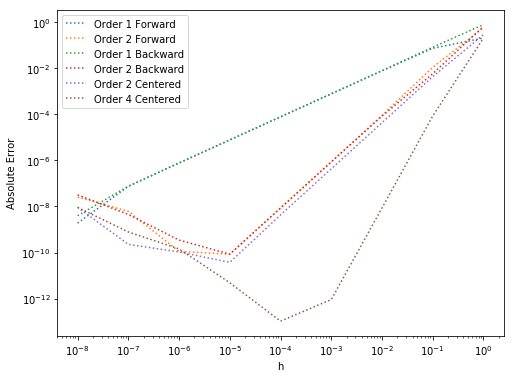

In [4]:
f, fprime = ex1func()

def ex3func(x0):
    out = fprime.subs('x', x0).evalf()
    return out

#Define grid

hgrid = np.logspace(-8, 0, 9)
errorf1 = []
errorf2 = []
errorb1 = []
errorb2 = []
errorc2 = []
errorc4 = []
for h in hgrid:
    errorf1.append(np.abs(ex3func(1) - forward1(f, [1], h)))
    errorf2.append(np.abs(ex3func(1) - forward2(f, [1], h)))
    errorb1.append(np.abs(ex3func(1) - backward1(f, [1], h)))
    errorb2.append(np.abs(ex3func(1) - backward2(f, [1], h)))
    errorc2.append(np.abs(ex3func(1) - centered2(f, [1], h)))
    errorc4.append(np.abs(ex3func(1) - centered4(f, [1], h)))

#plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(hgrid, errorf1, ':', label = "Order 1 Forward")
plt.plot(hgrid, errorf2, ':', label = "Order 2 Forward")
plt.plot(hgrid, errorb1, ':', label = "Order 1 Backward")
plt.plot(hgrid, errorb2, ':', label = "Order 2 Backward")
plt.plot(hgrid, errorc2, ':', label = "Order 2 Centered")
plt.plot(hgrid, errorc4, ':', label = "Order 4 Centered")
plt.legend()
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.xscale('log') 
plt.yscale('log')

## Exercise 4

In [5]:
# Load data
planedata = np.load("Data/plane.npy")
# Define functions for x and y
def x(a, α, β):
    x = a * np.tan(β) / (np.tan(β) - np.tan(α))
    return x

def y(a, α, β):
    y = a * (np.tan(β) * np.tan(α)) / (np.tan(β) - np.tan(α))
    return y

#Clean angle data
alphavec, betavec = planedata[:, 1], planedata[:, 2]
alphavec, betavec = np.deg2rad(alphavec), np.deg2rad(betavec)
xvec = x(500, alphavec, betavec)
yvec = y(500, alphavec, betavec)

#Estimate derivatives
xprime, yprime = np.zeros(8), np.zeros(8)
for t in range(8):
    if t == 0:
        xprime[t] = xvec[t+1] - xvec[t]
        yprime[t] = yvec[t+1] - yvec[t]
    elif t == 7:
        xprime[t] = xvec[t] - xvec[t-1]
        yprime[t] = yvec[t] - yvec[t-1]
    else:
        xprime[t] = (xvec[t+1] - xvec[t-1]) / 2
        yprime[t] = (yvec[t+1] - yvec[t-1]) / 2

#Get velocity
vel = np.sqrt(xprime **2 + yprime **2)
print("Speed is:", vel)

Speed is: [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


## Exercise 5

In [4]:
x = sy.symbols('x')
def ex5func(f, x0, h):
    '''
    Function accepts a function f: R^N -> R^M, a point x0 in R^N, and a floating 
    point h. Returns the N X M jacobian matrix associated to f which is estimated
    using the second order difference quotient. Recall that the columns of the 
    jacobian matrix are the directional derivatives in the direction of the standard
    basis vectors of R^N. 
    It is essential that the point x0 be of the correct shape or else the function
    will break. Please read in x0 is a NP ARRAY ROW!
    '''
    n = np.shape(x0)[0]
    m = np.shape(f(x0))[0]
    # Initialize basis vectors (columns of Id_N)
    I = np.eye(n)
    #Create Jacobian
    J = np.zeros((m, n))
    print(J)
    for i in range(n):
        dderiv = (f(x0 + h * I[:, i]) -  f(x0 - h * I[:, i])) / (2 * h)
        J[:, i] = dderiv
    return J

f = lambda x: np.array([x[0] ** 3 + x[1] ** 5 + x[2], 2 * x[0] - 3 * x[2]])
ex5func(f, np.array([1, 1, 5]), .021)

#np.shape(f([1, 1, 1]))

[[0. 0. 0.]
 [0. 0. 0.]]


array([36, -7])

## Exercise 6

In [7]:
import autograd
import autograd.numpy as anp
import time

In [8]:
f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))  
#Using autograd
time1 = time.time()
grad_f = autograd.grad(f)
out = grad_f(anp.pi/4)
time2 = time.time()
print("Derivative at pi/4 =", out, \
     "\n Time elapsed =", time2-time1)

Derivative at pi/4 = 0.23025901114696085 
 Time elapsed = 0.000997304916381836


In [13]:
f = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))  
#Using second ordered central difference quotient
h = .01
time1 = time.time()
out = (f(np.pi/4 + h) - f(np.pi/4 - h))/ (2*h)
time2 = time.time()
print("Derivative at pi/4 =", out, \
     "\n Time elapsed =", time2 - time1)

Derivative at pi/4 = 0.23027619108791086 
 Time elapsed = 0.0


In [10]:
#Using sympy
x = sy.symbols('x')
f = sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
time1 = time.time()
fprime = sy.diff(f)
out = fprime.subs('x', sy.pi/4)
time2 = time.time()
print("Derivative at pi/4 =", out, \
     "\n Time elapsed =", time2-time1)

Derivative at pi/4 = cos(sqrt(pi)/2)/(2*sqrt(pi)*sin(sqrt(pi)/2)) 
 Time elapsed = 0.014959096908569336


## Exercise 7


In [43]:
def taysin():
    #define func
    f = lambda x: anp.sin(x)
    #define derivatives
    deriv1 = autograd.elementwise_grad(f)
    deriv2 = autograd.elementwise_grad(deriv1)
    # plot
    xgrid = np.linspace(-np.pi, np.pi, 100)
    fgrid = f(xgrid)
    deriv1grid = deriv1(xgrid)
    deriv2grid = deriv2(xgrid)
    plt.plot(xgrid, fgrid, label = "Original function")
    plt.plot(xgrid, deriv1grid, label = "First Derivative")
    plt.plot(xgrid, deriv2grid, label = "Second Derivative")
    plt.legend(loc = 'center left', bbox_to_anchor=(1, .5))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Sin(x) and its Derivatives')
    plt.show()

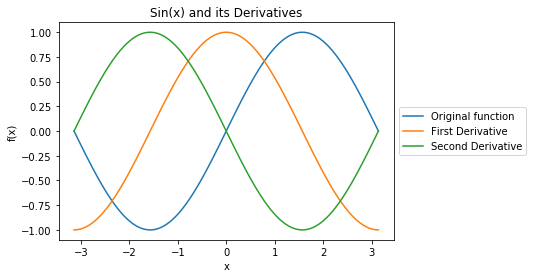

In [44]:
taysin()

## Exercise 8

I REALLY don't like sympy so I'll save this one for later.